In [3]:
import pandas as pd

# Load data CSV untuk analisis
df = pd.read_csv("/content/emails.csv")

# Menampilkan 5 baris pertama dan informasi umum
df_info = df.info()
df_head = df.head()

df_info, df_head

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5728 non-null   object
 1   spam    5728 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 89.6+ KB


(None,
                                                 text  spam
 0  Subject: naturally irresistible your corporate...     1
 1  Subject: the stock trading gunslinger  fanny i...     1
 2  Subject: unbelievable new homes made easy  im ...     1
 3  Subject: 4 color printing special  request add...     1
 4  Subject: do not have money , get software cds ...     1)

# Exploratory Data Analysis (EDA)

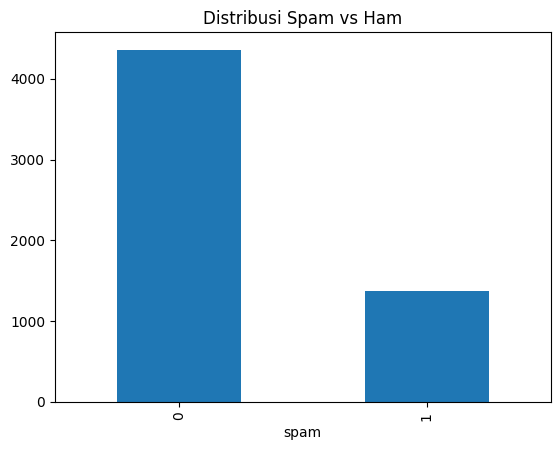

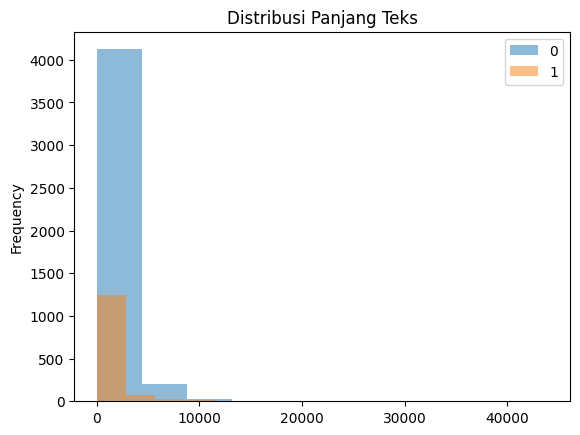

In [4]:
import matplotlib.pyplot as plt

# Distribusi label
df["spam"].value_counts().plot(kind="bar", title="Distribusi Spam vs Ham")
plt.show()

# Panjang teks
df["text_length"] = df["text"].apply(len)
df.groupby("spam")["text_length"].plot(kind="hist", alpha=0.5, legend=True)
plt.title("Distribusi Panjang Teks")
plt.show()

# Text Preprocessing
Cleaning, tokenisasi, dan normalisasi teks.

In [5]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download("punkt_tab")
nltk.download("stopwords")
nltk.download("wordnet")

def preprocess_text(text):
    # Case folding
    text = text.lower()
    # Hapus karakter khusus
    text = re.sub(r"[^a-zA-Z0-9]", " ", text)
    # Tokenisasi
    tokens = nltk.word_tokenize(text)
    # Stopword removal
    stop_words = set(stopwords.words("english"))
    tokens = [word for word in tokens if word not in stop_words]
    # Lemmatisasi
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return " ".join(tokens)

df["cleaned_text"] = df["text"].apply(preprocess_text)

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


# Feature Engineering
TF-IDF atau Word Embeddings untuk representasi teks.

In [6]:
# TF-IDF Vectorizer (untuk model tradisional)
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

tfidf = TfidfVectorizer(max_features=1000)
X = tfidf.fit_transform(df["cleaned_text"])
y = df["spam"]

# Split data train-test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modeling
Model Tradisional: Naive Bayes

In [7]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

# Evaluasi

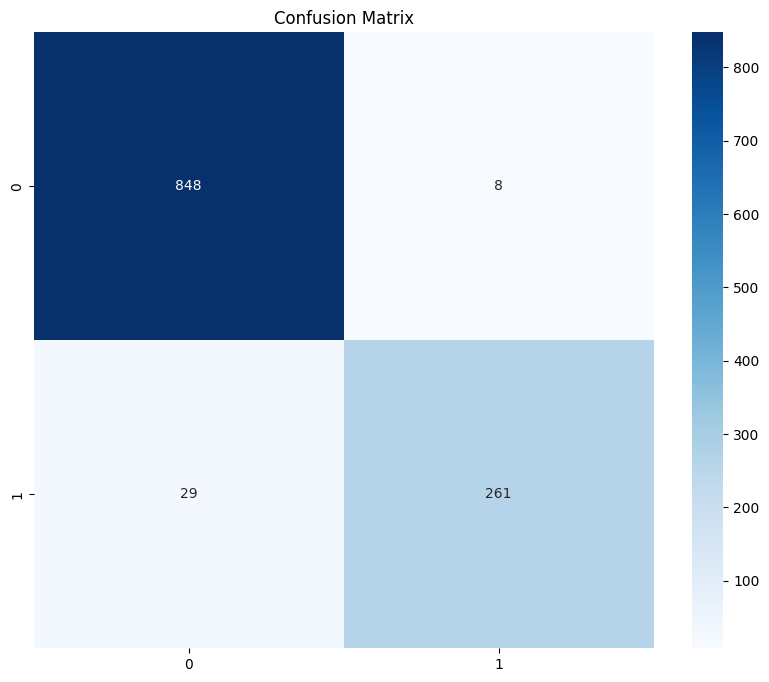

Train Evaluation:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99      3504
           1       0.96      0.94      0.95      1078

    accuracy                           0.98      4582
   macro avg       0.97      0.97      0.97      4582
weighted avg       0.98      0.98      0.98      4582

Test Evaluation:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       856
           1       0.97      0.90      0.93       290

    accuracy                           0.97      1146
   macro avg       0.97      0.95      0.96      1146
weighted avg       0.97      0.97      0.97      1146



In [8]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

print("Train Evaluation:\n", classification_report(y_train, y_train_pred))
print("Test Evaluation:\n", classification_report(y_test, y_test_pred))

# Error Analysis
Identifikasi pola kesalahan prediksi (false positive/negative).

In [9]:
y_test_reset = y_test.reset_index(drop=True)


y_pred_series = pd.Series(y_test_pred, index=y_test_reset.index)

false_positives = df.loc[y_test_reset[(y_test_reset == 0) & (y_pred_series == 1)].index]
print("False Positives:\n", false_positives["text"].head())

False Positives:
 47     Subject: failure notice  hi . this is the qmai...
135    Subject: free $ $ $ for business or personal c...
332    Subject: toners and inkjet cartridges for less...
659    Subject: all graphics software available , che...
944    Subject: unique logos / customer recognition (...
Name: text, dtype: object


# Simpan Model dan Vectorizer

In [14]:
import pickle

# simpan model dan vectorizer
with open("emailspam_model.pkl", "wb") as f:
    pickle.dump(model, f)

vectorizer = tfidf
with open("vectorizer.pkl", "wb") as f:
    pickle.dump(vectorizer, f)
